Comenzando entrenamiento...
Modelo entrenado


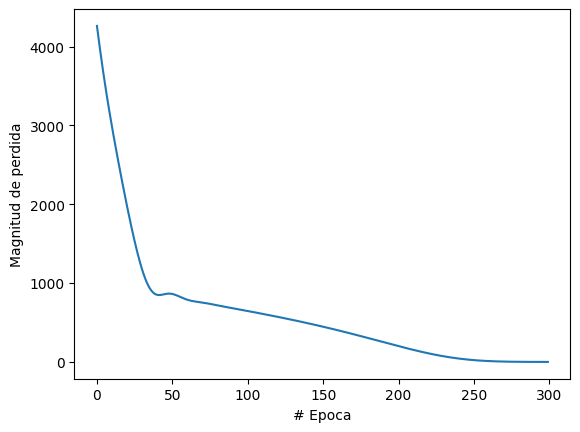

ValueError: Unrecognized data type: x=[100.0] (of type <class 'list'>)

In [7]:
#Basicamente lo que va a hacer la red neuronal es pasarle unos valores de celsius a fahrenheit y en base de unos metodos simples
#que vaya buscando el peso y el sesgo para obtener el resultado asociado a los valores de celsius.




#Importamos las librerias necesarias para IA
import tensorflow as tf
import numpy as np

#Importo una libreria para saber que tan bueno es el modelo entrenado
#Esta libreria nos muestra una gráfica de la perdida en base al numero de vueltas realizadas
import matplotlib.pyplot as plt




#Añadimos los valores de Celsius
celsius = np.array([-40, -10, 0, 8, 15, 22, 38], dtype=float)


#Añadimos los valores de Fahrenheit
fahrenheit = np.array([-40, 14, 32, 46.4, 59, 71.6, 100.4], dtype=float)

#-------------------------------------------------------------------------------------------------------------------------------
#Hacemos uso del framework keras, para crear las capas de la red neuronal
#Creamos una variable llamada capa, la cual le vamos a asignar la propiedad Dense (densa),
#la cual hace la conexion de una red neuronal a varias

oculta1 = tf.keras.layers.Dense(units=3, input_shape=[1])
oculta2 = tf.keras.layers.Dense(units=3)
salida = tf.keras.layers.Dense(units=1)

#El valor units se refiere al numero de neuronas que tendra la capa
#El valor input_shape le referimos que tenemos una entrada con una neurona

#-------------------------------------------------------------------------------------------------------------------------------

#Esta capa actualmente no está para poder trabajarla, es necesario de un modelo, el cual le daremos las capas necesarias.

modelo = tf.keras.Sequential([oculta1, oculta2, salida])

#En este momento vamos a usar un modelo keras secuencial (Sequential), debido a que es la mas simple.
#--------------------------------------------------------------------------------------------------------------------------------
#Ahora dicho modelo hay que compilarlo para que realize el proceso de aprendizaje.
#Para ello es necesario pasarle algunas propiedades para que sepa como queremos que las haga.
#Vamos a hacer uso de un compilador

modelo.compile(
    #Le vamos a dar dos propiedades: el optimizador y la funcion de perdida

    #Para el optimizador vamos a usar Adam, la cual es un algoritmo de aprendizaje
    #el cual es el que va a llevar a cabo el cambio del peso y el sesgo
        #Se le pone al optimizador una valor, es un valor numero que va a ser la tasa de aprendizaje
        #esto le va a decir cuanto va a ajustar el peso y el sesgo
        #A menor numero aumenta el valor de la tasa de aprendizaje, ya que irá haciendo cambios más precisos pero más lentos
        #A mayor numero es menos preciso pero será más rápido
    optimizer=tf.keras.optimizers.Adam(0.01),
    loss='mean_squared_error'

    #En la funcion de perdida (loss), vamos a hacer uso de mean_squared_error, la cual es una perdida cuadratica
    #Este error considera que poca cantidad de errores grandes es peor que muchos errores pequeños

)


#-------------------------------------------------------------------------------------------------------------------------------

#Empezamos a entrenarlo

print("Comenzando entrenamiento...")

#Creamos una variable para empezar el entrenamiento
#En este caso va a ser historial
historial = modelo.fit(celsius, fahrenheit, epochs=300, verbose=False)

#Le implicamos el modelo anterior, y dentro de la funcion fit le ponemos los datos con los que va a trabajar
#De datos le pondremos las variables array con los datos celsius y fahrenheit
#En el valor epochs le indico cuantas veces se va a realizar el proceso de aprendizaje
#1 sola vez sería revisar 7 datos
#verbose = False, para que no se muestre la informacion de cada iteracion y no se muestre mucha cosa por pantalla



#Una vez entrenado nos imprimirá este mensaje
print("Modelo entrenado")



#Hago uso de la libreria para graficar la perdida
plt.xlabel('# Epoca')
plt.ylabel('Magnitud de perdida')
plt.plot(historial.history['loss'])
plt.show()


In [6]:
resultado = modelo.predict([100.0])
print("Prediccion: 100 grados celsius son " + str(resultado) + " fahrenheit!")

ValueError: Unrecognized data type: x=[100.0] (of type <class 'list'>)

In [ ]:
#Para usar el programa en PAGINA WEB es necesario EXPORTAR el modelo en este caso en formato h5
modelo.save('celsius_a_fahrenheit.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
#El equipo es Linux. Listamos el contenido de la carpeta actual para ver
#que se exporto el modelo
!ls

celsius_a_fahrenheit.h5  sample_data


In [ ]:
#Para convertirlo a tensorflow.js, primero debemos instalar la libreria
!pip install tensorflowjs

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 873.6 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 74.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 939.1 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 70.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 58.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 75.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 56.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 47.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 26.9 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.0
    Uninstalling packaging-24.0:
      Successfully uninstalled packaging-24.0
  Attempting uninstall: ml-dtypes


In [ ]:
#Creamos una carpeta en donde colocaremos los archivos de la conversion
!mkdir carpeta_salida

In [ ]:
#REalizaremos la exportacion a la carpeta de salida
!tensorflowjs_converter --input_format keras celsius_a_fahrenheit.h5 carpeta_salida

2024-03-26 18:40:58.834326: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [ ]:
#Listamos el contenido de la carpeta de salida
#para saber si se han generado los archivos bin y json
!ls carpeta_salida

group1-shard1of1.bin  model.json


In [ ]:
#Con estos procedimientos, en la barra del lateral izquierdo de colab
#hay un icono de la carpeta, donde nos mostrara la carpeta creada anteriormente
#de dicha carpeta nos descargamos los dos archivos creados
#y para usarlo en nuestra pagina web la importamos con un script
#de js en el html